<a href="https://colab.research.google.com/github/keithferns98/TimeSeriesAnalysis/blob/main/Multivariate_VectorAutoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import grangercausalitytests,adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


VECTOR AUTO REGRESSION EQUATION

In [2]:
filepath='https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
macro_data=pd.read_csv(filepath,parse_dates=['date'],index_col='date')
print(macro_data.shape)
macro_data.head()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


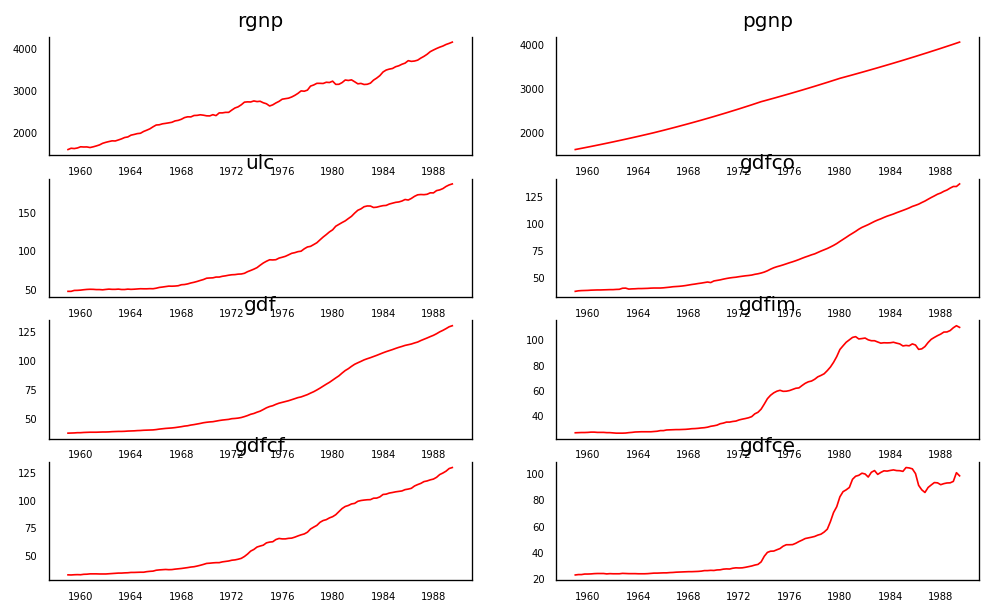

In [5]:
fig,axes=plt.subplots(nrows=4,ncols=2,dpi=120,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
  data= macro_data[macro_data.columns[i]]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(macro_data.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines['top'].set_alpha(0)
  ax.tick_params(labelsize=6)

In [7]:
ad_fuller_result_1=adfuller(macro_data['rgnp'].diff()[1:])
print('realgdp')
print(f'ADF statistics:{ad_fuller_result_1[0]}')
print(f'p-value:{ad_fuller_result_1[1]}')
print('\n------------\n')

ad_fuller_result_2=adfuller(macro_data['ulc'].diff()[1:])
print('realcons')
print(f'ADF statistics.{ad_fuller_result_2[0]}')
print(f'p-value.{ad_fuller_result_2[1]}')

realgdp
ADF statistics:-5.427594381007333
p-value:2.9633019848469254e-06

------------

realcons
ADF statistics.-3.5760804731509097
p-value.0.0062351318302382


In [9]:
macro_data['rgnp'].diff()[1:]

date
1959-04-01    30.6
1959-07-01    -7.5
1959-10-01    13.9
1960-01-01    28.2
1960-04-01    -4.8
              ... 
1988-07-01    32.0
1988-10-01    26.7
1989-01-01    37.4
1989-04-01    25.7
1989-07-01    30.4
Name: rgnp, Length: 122, dtype: float64

In [10]:

print('rgnp causes ulc?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['ulc', 'rgnp']], 4)

print('\nulc causes rgnp?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['rgnp', 'ulc']], 4)


rgnp causes ulc?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=22.9444 , p=0.0000  , df=1
likelihood ratio test: chi2=21.0242 , p=0.0000  , df=1
parameter F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=16.1029 , p=0.0003  , df=2
likelihood ratio test: chi2=15.1179 , p=0.0005  , df=2
parameter F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=23.9675 , p=0.0000  , df=3
likelihood ratio test: chi2=21.8515 , p=0.0001  , df=3
parameter F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F

In [11]:
macro_data_1=macro_data[['ulc','rgnp']]
print(macro_data.shape)

(123, 8)


In [12]:
train_df=macro_data_1[:-12]
test_df=macro_data_1[-12:]

In [15]:
print(test_df.shape)

(12, 2)


In [16]:
from statsmodels.tsa.api import VAR

In [17]:
model=VAR(train_df.diff()[1:])


In [18]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.778       6.834       878.3       6.800
1        5.988      6.154*       398.5       6.055
2        5.942       6.220       380.9       6.054
3        5.933       6.322       377.4       6.090
4       5.793*       6.293      328.5*      5.995*
5        5.873       6.484       356.3       6.120
6        5.828       6.550       341.1       6.119
7        5.894       6.727       365.0       6.230
8        5.890       6.835       364.8       6.271
9        5.942       6.998       385.8       6.368
10       5.930       7.097       382.9       6.401
11       5.913       7.191       378.5       6.428
12       5.885       7.274       370.7       6.445
13       5.925       7.424       388.6       6.529
14       5.882       7.493       376.0       6.532
15       5.950       7.672       406.9       6.644
16       5.933       7.766     

In [19]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:        ['ulc', 'rgnp']   No. Observations:                  111
Model:                         VAR(4)   Log Likelihood              -11857.868
                          + intercept   AIC                          23757.736
Date:                Wed, 11 Aug 2021   BIC                          23814.636
Time:                        08:14:06   HQIC                         23780.818
Sample:                    01-01-1959                                         
                         - 07-01-1986                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):               83.84, 724.67   Jarque-Bera (JB):         18.17, 13.83
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.62, 0.28   Skew:                      0.61, -0.86
Prob(H) (two-sided):            0.15,

In [20]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [21]:
predictions.columns=['ulc_predicted','rgnp_prediced']
predictions

,ulc_predicted,rgnp_prediced
1986-10-01,166.083739,3565.157919
1987-01-01,245.901672,3756.340425
1987-04-01,47.634923,3552.384303
1987-07-01,267.915191,3863.657398
1987-10-01,149.410651,3477.136094
1988-01-01,170.990200,3766.534506
1988-04-01,153.087614,3631.805315
1988-07-01,210.188533,3733.201868
1988-10-01,143.232496,3563.056652
1989-01-01,197.580349,3768.538810


In [22]:
predictions.tail()

,ulc_predicted,rgnp_prediced
1988-07-01,210.188533,3733.201868
1988-10-01,143.232496,3563.056652
1989-01-01,197.580349,3768.538810
1989-04-01,142.226293,3589.543301
1989-07-01,206.825173,3750.644549


In [23]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

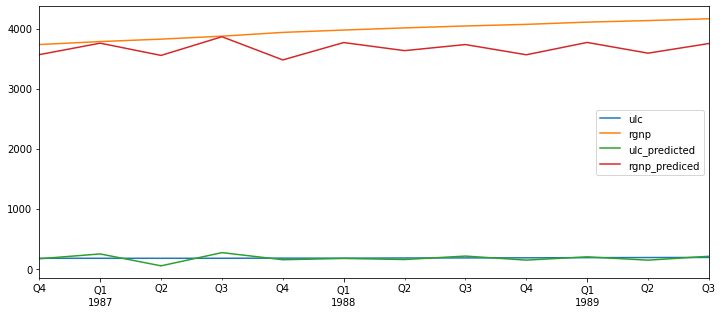

In [25]:
test_vs_pred.plot(figsize=(12,5))


In [27]:
test_df.head()

,ulc,rgnp
date,,
1986-10-01,173.2,3733.6
1987-01-01,173.6,3783.0
1987-04-01,173.4,3823.5
1987-07-01,173.9,3872.8
1987-10-01,175.8,3935.6


In [33]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

In [29]:
rmse_ulc=math.sqrt(mean_squared_error(predictions['ulc_predicted'],test_df['ulc']))
print('Mean value of Ulc is {} and rmse is{}'.format(mean(test_df['ulc']),rmse_ulc))

Mean value of Ulc is 178.56666666666666 and rmse is54.906898811679284


In [36]:
rmse_rgnp=math.sqrt(mean_squared_error(predictions['rgnp_prediced'],test_df['rgnp']))
print('Mean value of rgnp is{} and rmse_rgnp is {}'.format(mean(test_df['rgnp']),rmse_rgnp))

Mean value of rgnp is3970.6916666666666 and rmse_rgnp is 345.3434852726223
